In [1]:
import pandas as pd

mrda = pd.read_csv('../mrda/MRDA_data.csv')
small = mrda[0:500]
small

,speaker,utterance,Basic,General,Specific
0,fe016,okay.,F,fg,fg
1,fe016,so um,F,fh,fh
2,fe016,i was going to try to get out of here like in ...,S,s,rt
3,fe016,um,F,fh,fh
4,fe016,because i really appreciate people coming.,S,s,s
...,...,...,...,...,...
495,fe016,as easy it could as it could be.,S,s,e
496,fe016,but,F,fh,fh
497,fe016,i suppose that as long as they have a type her...,D,s,s
498,fe016,um,F,fh,fh


In [2]:
labels = small['Basic'].str.lower()
labels

0      f
1      f
2      s
3      f
4      s
      ..
495    s
496    f
497    d
498    f
499    s
Name: Basic, Length: 500, dtype: object

In [4]:
results = pd.read_csv('results/mrda_results.csv', index_col=False)
results

,Unnamed: 0,preds,explanations
0,0,f,"The utterance ""okay."" is classified as a Floor..."
1,1,f,"The utterance ""so um"" is classified as a Floor..."
2,2,s,"The utterance ""i was going to try to get out o..."
3,3,f,"The utterance ""um"" is classified as a Floor Gr..."
4,4,s,"The utterance ""because i really appreciate peo..."
...,...,...,...
495,495,s,"The utterance ""as easy it could as it could be..."
496,496,f,"The utterance ""but"" is classified as a Floor G..."
497,497,s,"The utterance ""i suppose that as long as they ..."
498,498,f,"The utterance ""um"" is classified as a Floor Gr..."


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Example DataFrames with true labels and model predictions
true_labels = labels
model_predictions = results['preds']

# Ensure that both DataFrames have the same length and index
assert len(true_labels) == len(model_predictions), "Lengths of true_labels and model_predictions should be the same."
assert true_labels.index.equals(model_predictions.index), "Indices of true_labels and model_predictions should be the same."

# Convert string labels to numerical labels if needed (depends on the specific metrics you want to compute)
# For example, if using precision, recall, and F1-score, numerical labels are required
label_mapping = {label: idx for idx, label in enumerate(true_labels.unique())}
true_labels_numeric = true_labels.map(label_mapping)
model_predictions_numeric = model_predictions.map(label_mapping)

# Compute evaluation metrics
accuracy = accuracy_score(true_labels, model_predictions)
precision = precision_score(true_labels_numeric, model_predictions_numeric, average='weighted')
recall = recall_score(true_labels_numeric, model_predictions_numeric, average='weighted')
f1 = f1_score(true_labels_numeric, model_predictions_numeric, average='weighted')

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, model_predictions))

# Compute and display confusion matrix with columns
conf_matrix = confusion_matrix(true_labels, model_predictions, labels=true_labels.unique())
conf_matrix_df = pd.DataFrame(conf_matrix, index=true_labels.unique(), columns=true_labels.unique())
print("\nConfusion Matrix:")
print(conf_matrix_df)

# Calculate accuracy for each class
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
class_accuracies_df = pd.DataFrame({'Accuracy': class_accuracies}, index=true_labels.unique())
print("\nAccuracy for Each Class:")
print(class_accuracies_df)


Accuracy: 0.6220
Precision: 0.7221
Recall: 0.6220
F1-score: 0.6295

Classification Report:
              precision    recall  f1-score   support

           b       0.18      0.84      0.29        19
           d       0.58      0.14      0.23        78
           f       0.47      0.91      0.62        55
           q       0.82      0.78      0.79        40
           s       0.83      0.66      0.73       308

    accuracy                           0.62       500
   macro avg       0.57      0.67      0.53       500
weighted avg       0.72      0.62      0.63       500


Confusion Matrix:
    f    s   d   b   q
f  50    3   0   2   0
s  29  203   6  67   3
d  24   35  11   4   4
b   2    1   0  16   0
q   2    4   2   1  31

Accuracy for Each Class:
   Accuracy
f  0.909091
s  0.659091
d  0.141026
b  0.842105
q  0.775000


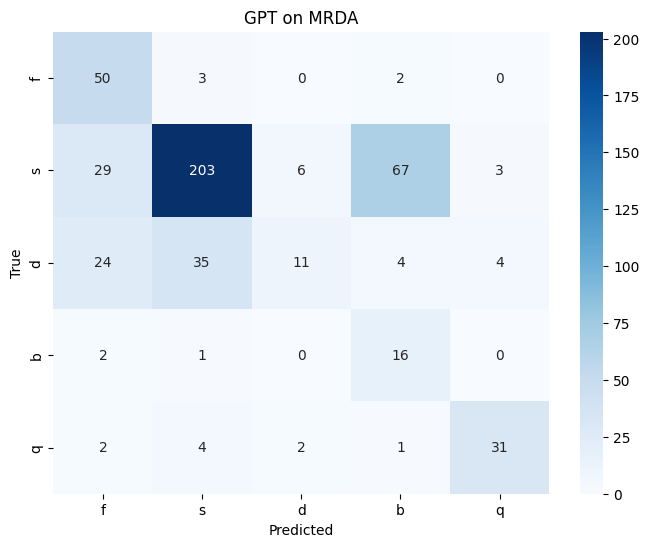

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns






# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=true_labels.unique(), yticklabels=true_labels.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GPT on MRDA')
plt.show()

In [50]:
results['true'] = labels
results['utterance'] = small['utterance']
results.to_csv('mrda_results_and_true.csv')